# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
import pandas as pd

In [2]:
pip install mysql-connector-python 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [4]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.70.140.45',
                              database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [5]:
cursor = con.cursor(buffered=True)

In [6]:
sql ="""
SELECT max(hire_date), min(hire_date) FROM employees
"""

In [7]:
cursor.execute(sql)

In [8]:
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП. 

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [9]:
sql ="""
SELECT s1.emp_no, s1.salary, s1.from_date, s1.to_date FROM salaries s1
JOIN (SELECT emp_no, max(to_date) as max_to_date, max(from_date) as max_from_date FROM salaries
      GROUP BY emp_no) s2
ON (s1.emp_no=s2.emp_no AND s1.to_date = s2.max_to_date AND s1.from_date = s2.max_from_date)
"""

In [12]:
res = pd.read_sql(sql, con)

C:\Users\User\AppData\Local\Temp\ipykernel_6760\1608642757.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql(sql, con)


In [13]:
field_names = [i[0] for i in cursor.description]
display(field_names)
display(res.shape)
display(res[:3])

['emp_no', 'salary', 'from_date', 'to_date']

(300024, 4)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


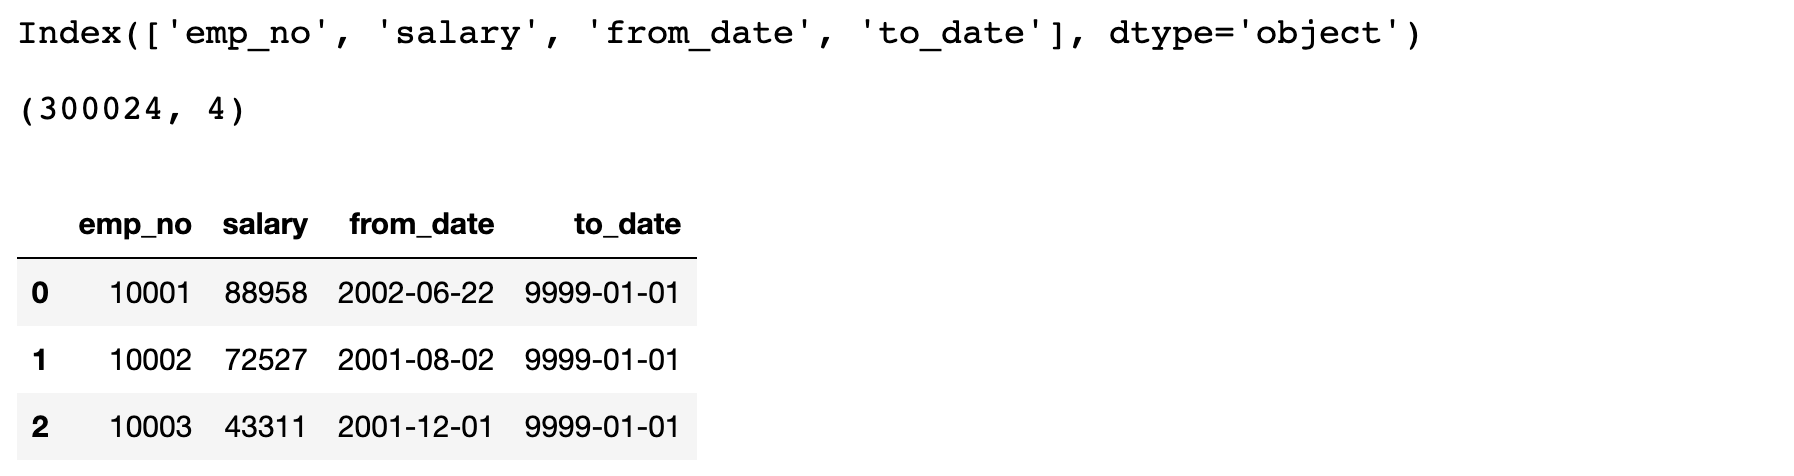

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [14]:
print(res['to_date'].dtype)

object


In [15]:
count_9999 = (res.to_date == datetime.date(9999, 1, 1)).sum()
print("Pівні '9999-01-01':", count_9999)
count_not_9999 = len(res) - count_9999
print("Не рівні '9999-01-01':", count_not_9999)

Pівні '9999-01-01': 240124
Не рівні '9999-01-01': 59900


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

In [16]:
import matplotlib.pyplot as plt

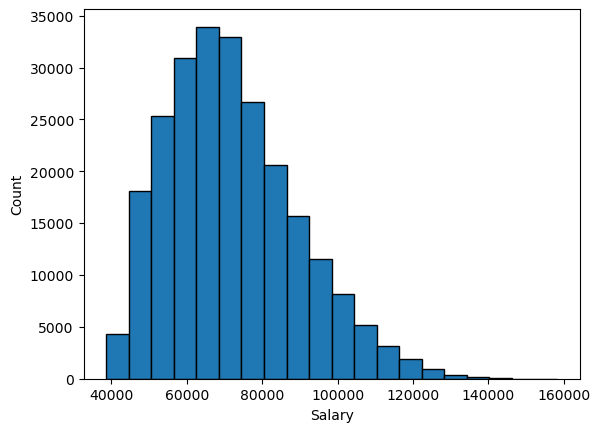

In [17]:
working_emp = res[res.to_date == datetime.date(9999, 1, 1)]
plt.hist(working_emp['salary'], bins=20, edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

7.Виведіть кількість співробітників за роком, в який вони були найняті (`hire_date`) використовуючи `pandas.read_sql`. Запишіть результат в змінну `df` та виведіть значення змінної на екран.

In [18]:
sql = """
SELECT year(hire_date) as hire_year, count(emp_no) as emp_num FROM employees 
GROUP BY hire_year
"""

In [19]:
df = pd.read_sql(sql, con)

C:\Users\User\AppData\Local\Temp\ipykernel_6760\1454131049.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con)


In [20]:
df

,hire_year,emp_num
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


Очікуваний результат:

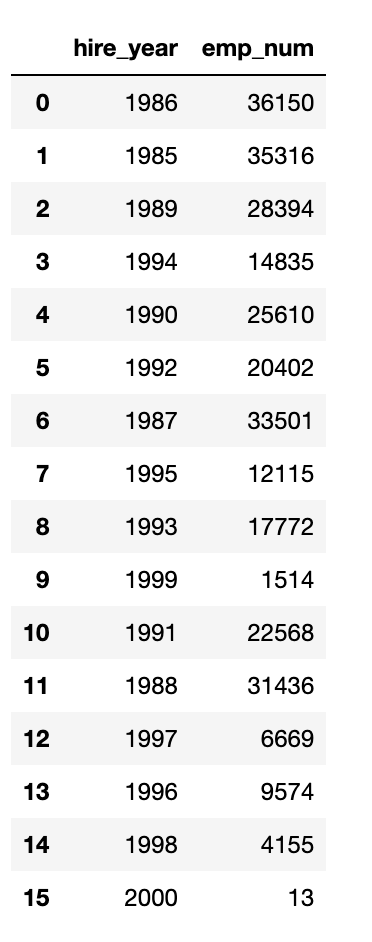

8.Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

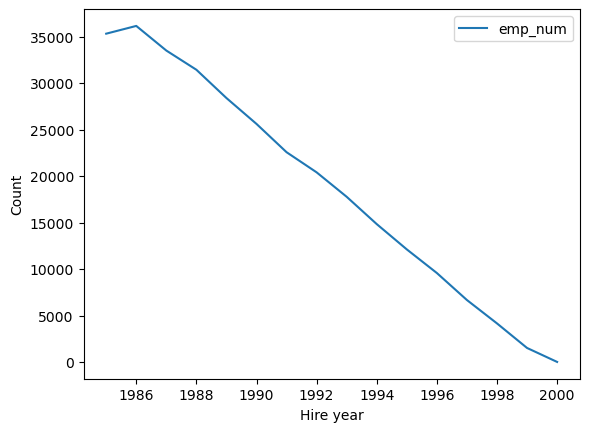

In [21]:
plt.plot(df['hire_year'], df['emp_num'], label = 'emp_num')
plt.xlabel('Hire year')
plt.ylabel('Count')
plt.legend()
plt.show()

Очікуваний результат:

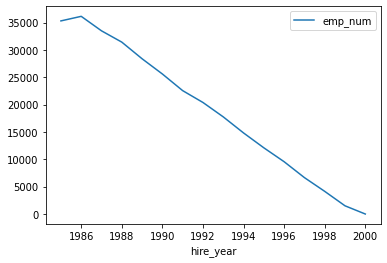

9.З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [22]:
sql = """
SELECT e.emp_no, t.from_date, t.to_date,
       timestampdiff(YEAR, t.from_date, t.to_date) AS duration
FROM employees e
JOIN titles t ON e.emp_no = t.emp_no
WHERE t.title = 'Engineer' AND t.to_date != '9999-01-01'
"""

In [23]:
df_years = pd.read_sql(sql, con)

C:\Users\User\AppData\Local\Temp\ipykernel_6760\1930803604.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_years = pd.read_sql(sql, con)


In [24]:
df_years

,emp_no,from_date,to_date,duration
0,10004,1986-12-01,1995-12-01,9
1,10009,1990-02-18,1995-02-18,5
2,10012,1992-12-18,2000-12-18,8
3,10018,1987-04-03,1995-04-03,8
4,10026,1995-03-20,2001-03-19,5
...,...,...,...,...
84015,499972,1989-11-23,1998-11-23,9
84016,499984,1989-07-30,1994-07-30,5
84017,499994,1993-02-22,1993-10-27,0
84018,499996,1996-05-13,2002-05-13,6


Очікуваний результат:

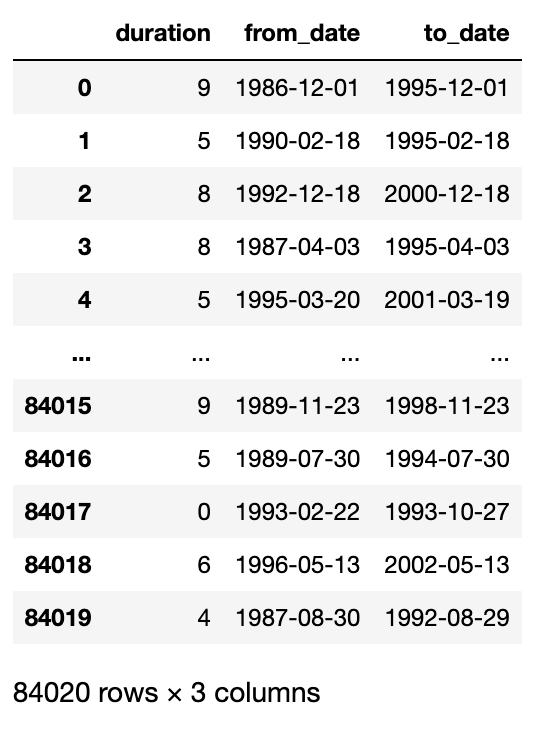

10.Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

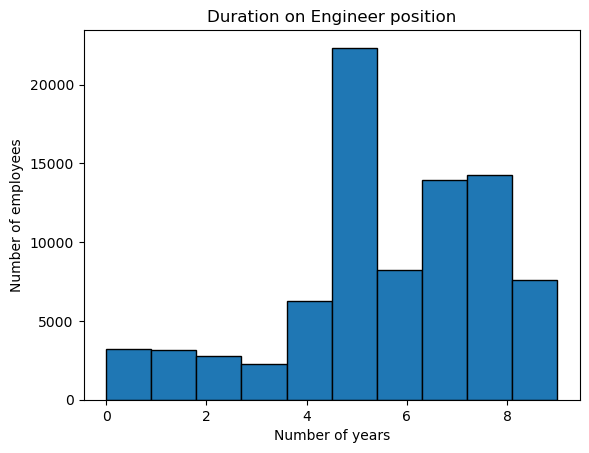

In [25]:
plt.hist(df_years['duration'], bins=10,
         edgecolor='black')
plt.xlabel('Number of years')
plt.ylabel('Number of employees')
plt.title('Duration on Engineer position')
plt.show()

Очікуваний результат:

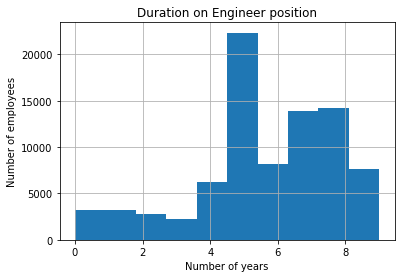

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [26]:
con.close()